In [63]:
#Importing important Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
from dotenv import dotenv_values
from scipy import stats

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder
import zipfile

##stat models 
from statsmodels.tsa.stattools import adfuller as adf ##for adf test
import statsmodels.api as sma ### for seasonal decomposition 
from statsmodels.graphics.tsaplots import plot_acf as ACF
from statsmodels.graphics.tsaplots import plot_pacf as PACF
from statsmodels.tsa.stattools import grangercausalitytests ##grenger causality test
from statsmodels.tsa.ar_model import AutoReg
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GroupKFold, RepeatedKFold, KFold

##Algorithms 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

from statsmodels.tsa.ar_model import AutoReg


from sklearn import metrics

## Let us first look at our data #1 Train data

In [3]:
zf = zipfile.ZipFile('Data.zip') 
train_data = pd.read_csv(zf.open('Data/train.csv'))

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


as we can see it has ID, Date, Store_nbr, family and on promotion, since we are going to anlyze time series analysis better to convert date data type to data and time 

In [4]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [5]:
# Get the values for the credentials you set in the '.env' file
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("dap-projects-database.windows.net")
username = environment_variables.get("dataAnalyst_LP3")
password = environment_variables.get("dapDB")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [93]:
connection = pyodbc.connect(connection_string)

# 2 Holidays data

In [6]:
holi_day_data = pd.read_csv(zf.open('holidays_events.csv'))

holi_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


Similarly convert Date data type in to date and time 

In [7]:
holi_day_data['date'] = pd.to_datetime(holi_day_data['date'])
holi_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


# 3 Oil data

In [8]:
oil_data = pd.read_csv(zf.open('oil.csv'))

oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


Again similarly change date's data type to date and time

In [9]:
oil_data['date'] = pd.to_datetime(oil_data['date'])
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


# 4 Sample submission data

In [10]:
submission_data = pd.read_csv(zf.open('sample_submission.csv'))

submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


# 5 stores data

In [11]:
store_data = pd.read_csv(zf.open('stores.csv'))

store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


# 6 transaction data

In [12]:
transaction_data = pd.read_csv(zf.open('Data/transactions.csv'))

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [13]:
transaction_data['date'] = pd.to_datetime(transaction_data['date'])
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


# 7 Test data

In [14]:
test_data = pd.read_csv(zf.open('test.csv'))

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [15]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [16]:
# checking null value
train_data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

## let us visualize trends of sales per month

Text(0.5, 1.0, 'Sales per week')

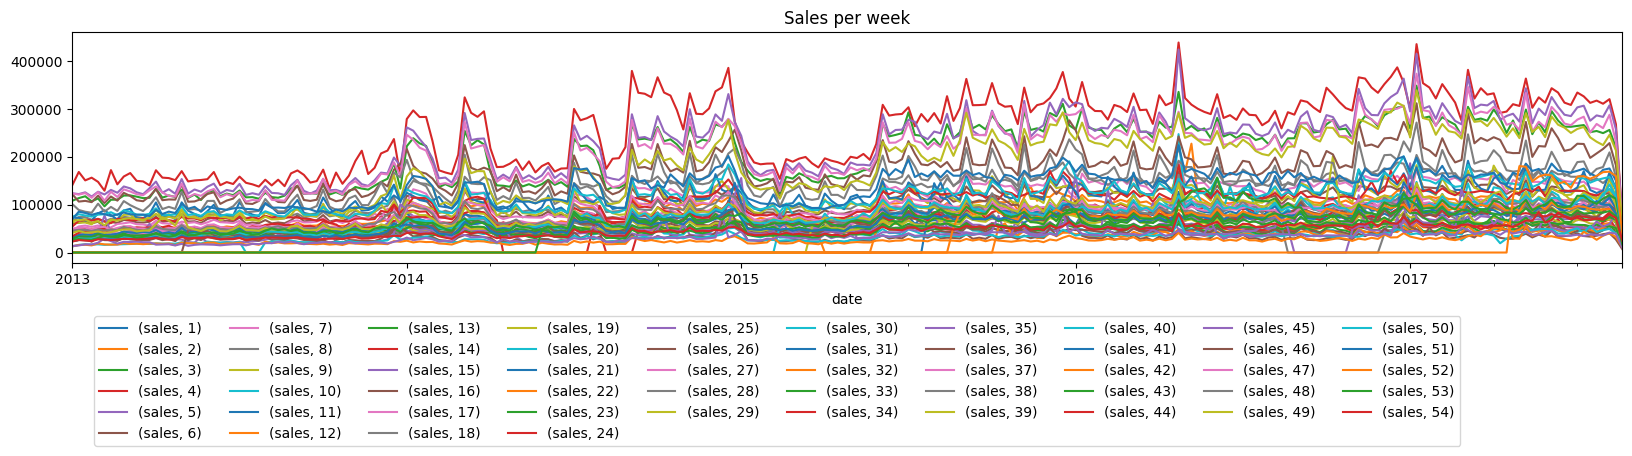

In [17]:
sales_per_store_weekly = (
    train_data
    .groupby(['date', 'store_nbr'])
    .aggregate({'sales': 'sum'})
    .unstack()
    .resample('1W') # displaying weekly progress in time series analysis
    .sum()
)
sales_per_store_weekly.plot(figsize=(20,3))
plt.legend(bbox_to_anchor=(0.9,-.2), ncol=10)
plt.title("Sales per week")

## visualization of sales per product family per month

Text(0.5, 1.0, 'Sales of product family per month')

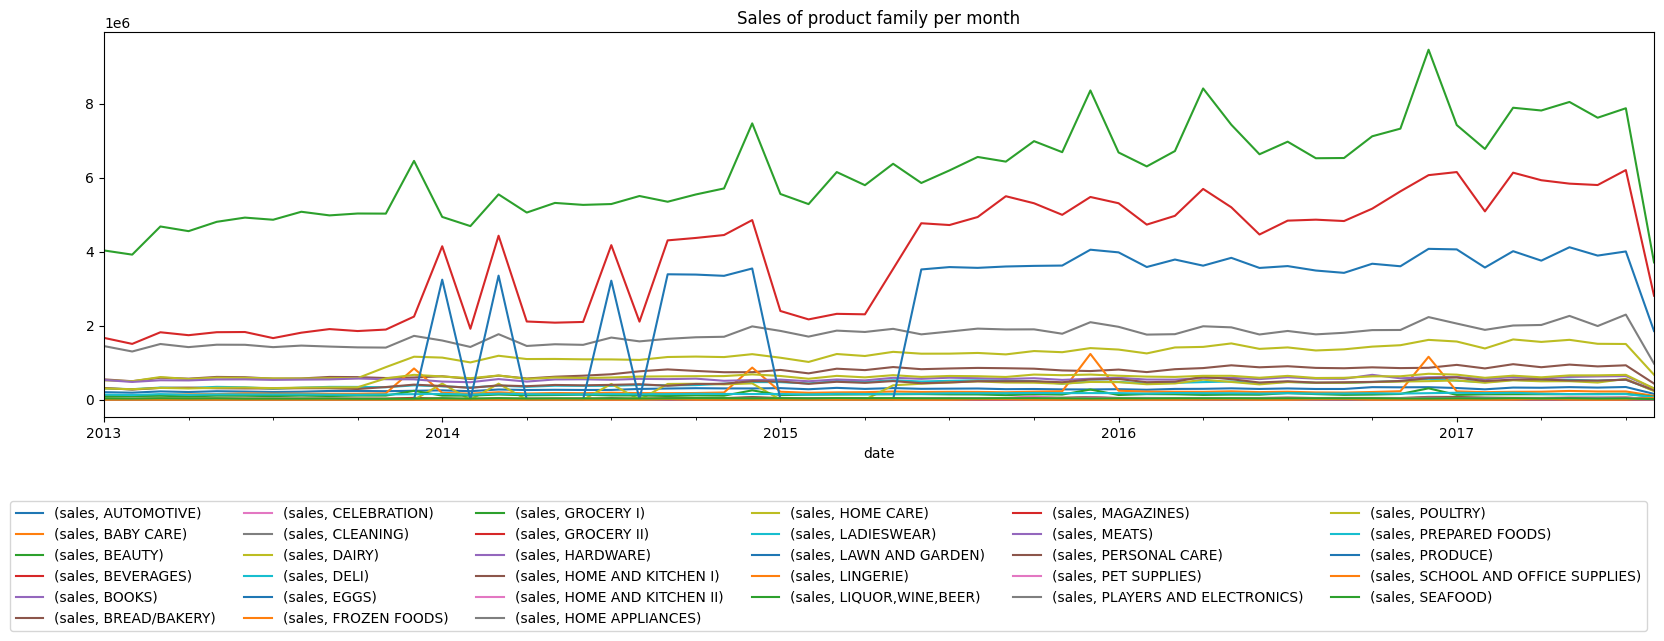

In [19]:
family_sales_per_month = (
    train_data
    .groupby(['date', 'family'])
    .aggregate({'sales': 'sum'})
    .unstack()
    .resample('1M')
    .sum()
)
family_sales_per_month.plot(figsize=(20,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("Sales of product family per month")

In [20]:
oil_data.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [21]:


oil_data.fillna(method = 'ffill', inplace = True)

Text(0.5, 1.0, 'Oil price')

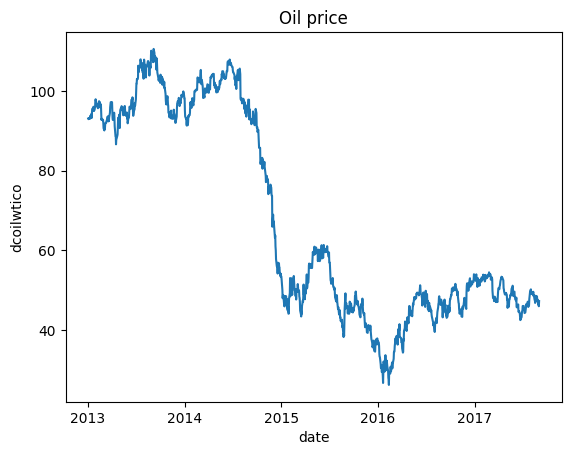

In [22]:
# Trends of Oil price 
sns.lineplot(data=oil_data, x = 'date', y = 'dcoilwtico')
plt.title('Oil price')

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


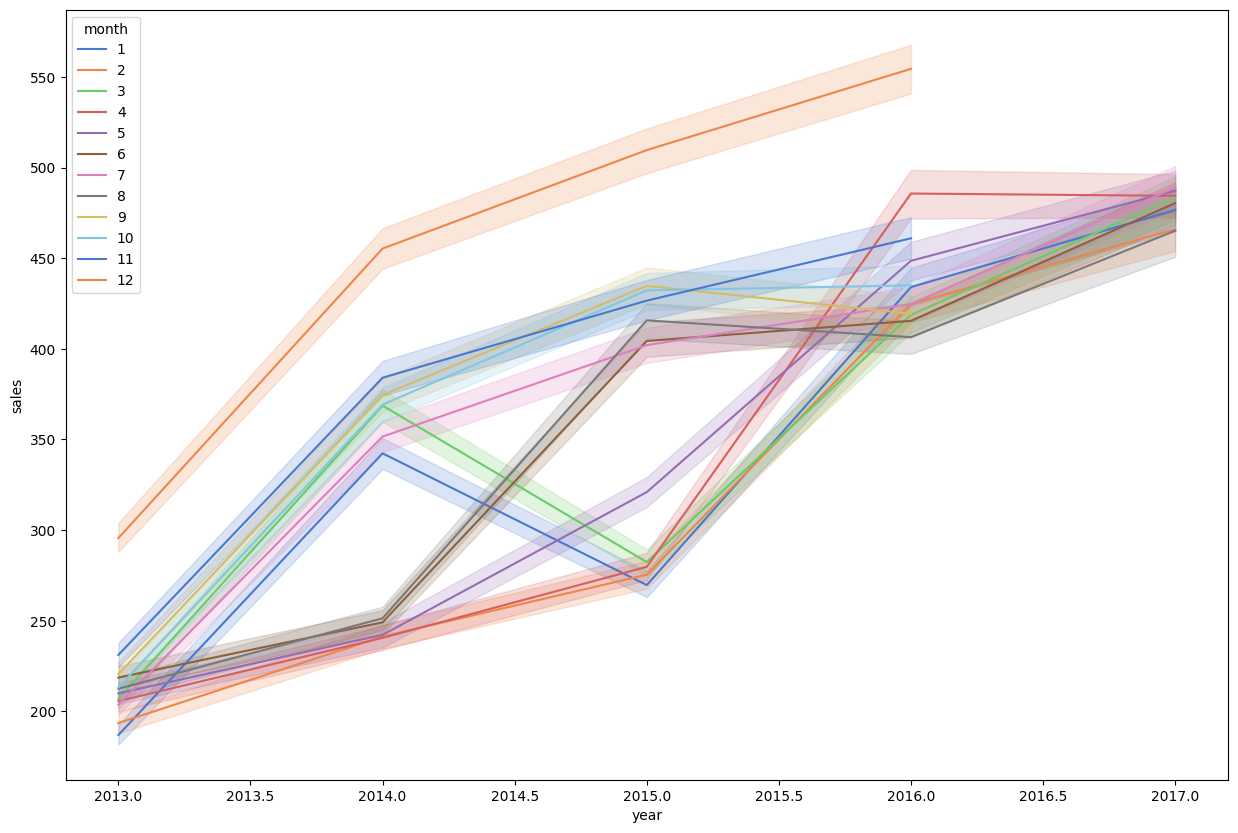

In [23]:
train_data['date'] = pd.to_datetime(train_data.date, format='%Y/%m/%d')

train_data['day'] = pd.DatetimeIndex(train_data.date).day
train_data['month'] = pd.DatetimeIndex(train_data.date).month
train_data['year'] = pd.DatetimeIndex(train_data.date).year

fig, ax = plt.subplots(figsize=(15,10))

sns.lineplot(
    data = train_data,
    x = 'year', 
    y = 'sales',
    hue = 'month',
    palette='muted'
)
transaction_data

## Sample checking for seasonlity 

In [24]:
store_sales = pd.read_csv(
    zf.open('Data/train.csv'),
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
store_sales.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_18468\3097407281.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv(


sales
store_nbr family     date             
1         AUTOMOTIVE 2013-01-01    0.0
                     2013-01-02    2.0
                     2013-01-03    3.0
                     2013-01-04    3.0
                     2013-01-05    5.0
                     2013-01-06    2.0
                     2013-01-07    0.0
                     2013-01-08    2.0
                     2013-01-09    2.0
                     2013-01-10    2.0

In [25]:
average_sales = (
    store_sales
    .groupby('date').mean()
    .squeeze()
    .loc['2017']
)
average_sales.head()

date
2017-01-01      6.780303
2017-01-02    786.928406
2017-01-03    619.740234
2017-01-04    555.607971
2017-01-05    436.375397
Freq: D, Name: sales, dtype: float32

In [26]:
def seasonal_plot(season='year', index='month', column=None):
    if column == None:
        column =pd.columns[0]
        
    piv_index = getattr(pd.index, index)
    piv_season = getattr(pd.index, season)
    
    piv = pd.pivot_table(pd, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(12,8))


In [27]:
df_trans = transaction_data.copy().set_index("date")
df_trans.head()
monthly_trans= df_trans.drop(labels= "store_nbr",axis= 1).resample("M").median()
monthly_trans.head()

,transactions
date,
2013-01-31,1386.0
2013-02-28,1403.5
2013-03-31,1424.0
2013-04-30,1423.5
2013-05-31,1424.0


Text(0.5, 1.0, ' Monthly Average Transactions')

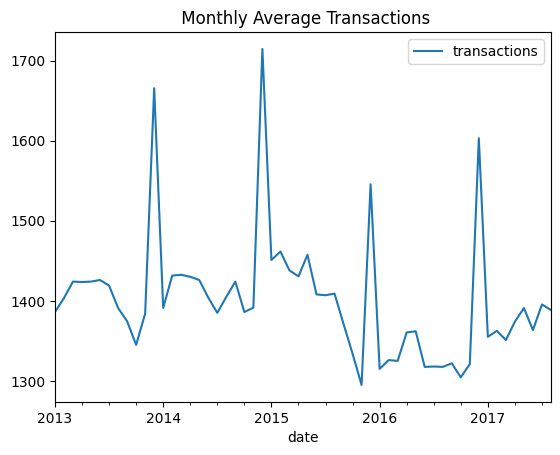

In [28]:
monthly_trans.plot()
plt.title(" Monthly Average Transactions")

In [29]:
df_train = train_data.copy().set_index("date")

In [30]:
df_train

,id,store_nbr,family,sales,onpromotion,day,month,year
date,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,1,1,2013
2013-01-01,1,1,BABY CARE,0.000,0,1,1,2013
2013-01-01,2,1,BEAUTY,0.000,0,1,1,2013
2013-01-01,3,1,BEVERAGES,0.000,0,1,1,2013
2013-01-01,4,1,BOOKS,0.000,0,1,1,2013
...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,15,8,2017
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,15,8,2017
2017-08-15,3000885,9,PRODUCE,2419.729,148,15,8,2017


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'store_nbr'}>,
        <Axes: title={'center': 'sales'}>],
       [<Axes: title={'center': 'onpromotion'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

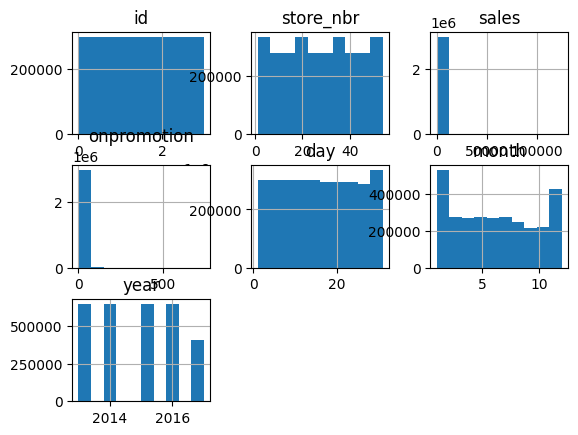

In [31]:
df_train.hist()

<Axes: >

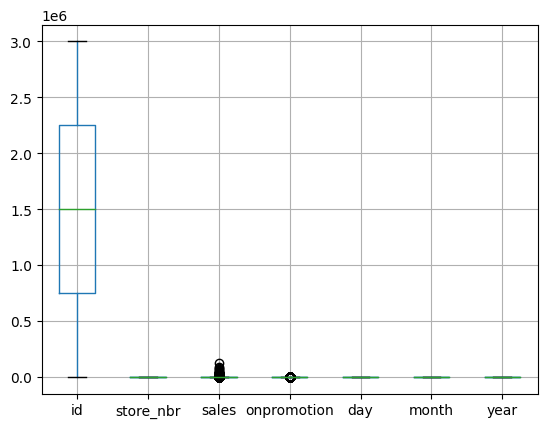

In [32]:
df_train.boxplot()

In [33]:
merged_A = pd.merge(train_data, transaction_data, how='inner', on=['date', 'store_nbr'])

merged_B = pd.merge(merged_A, holi_day_data, how='inner', on='date')

merged_C = pd.merge(merged_B, oil_data, how='inner', on='date')

merged = pd.merge(merged_C, store_data, how='inner', on='store_nbr')

In [34]:
merged.head()

,id,date,store_nbr,family,sales,onpromotion,day,month,year,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [35]:
#Rename column name type x and type y 
merged = merged.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})
merged.head()

,id,date,store_nbr,family,sales,onpromotion,day,month,year,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,1,1,2013,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


#### Hypothesis Testing

#### - H0: Promotional activities does not have a significant impact on the store sales.
#### - H1: Promotional activities have a significant impact on the store sales.

In [36]:
# Select the promotion data for the product family
promotion_data = merged.loc[merged['family'] == 'YOUR_PRODUCT_FAMILY', 'onpromotion']

# Select the sales data for the product family
sales_data = merged.loc[merged['family'] == 'YOUR_PRODUCT_FAMILY', 'sales']

# Create a contingency table
contingency_table = [
    [sum(promotion_data & (sales_data > 0)), sum((~promotion_data) & (sales_data > 0))],
    [sum(promotion_data & (sales_data == 0)), sum((~promotion_data) & (sales_data == 0))]
]

# Perform the chi-square test of independence
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Promotional activities does not have a significant impact on the store sales")
else:
    print("Promotional activities have a significant impact on the store sales")

Promotional activities have a significant impact on the store sales


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\contingency.py:134: RuntimeWarning: invalid value encountered in divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


### linear regression model building


### Univariant Modeling

In [37]:
# in order to get an idea of the the daily total unit sales from the various stores,the train data will be grouped by date.


Sale_uni= train_data.drop(["id", "store_nbr", "family", "onpromotion", "month","day","year"], axis=1)

Sale_uni= Sale_uni.set_index("date")

In [38]:
Sale_uni= Sale_uni.groupby(Sale_uni.index).agg({"sales": sum})

<Axes: xlabel='date'>

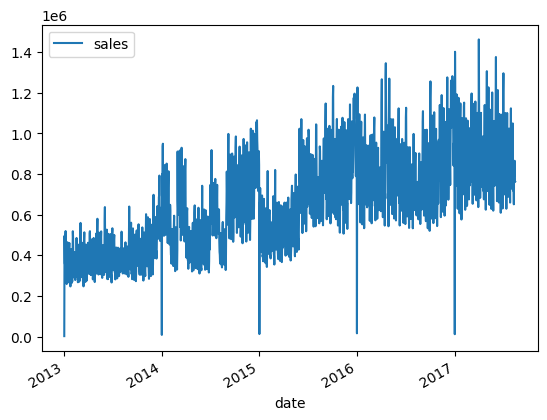

In [39]:
Sale_uni.plot()

As it can be seen there wer a dcline of sales in the beginning of each year


### time series modeling using ACF

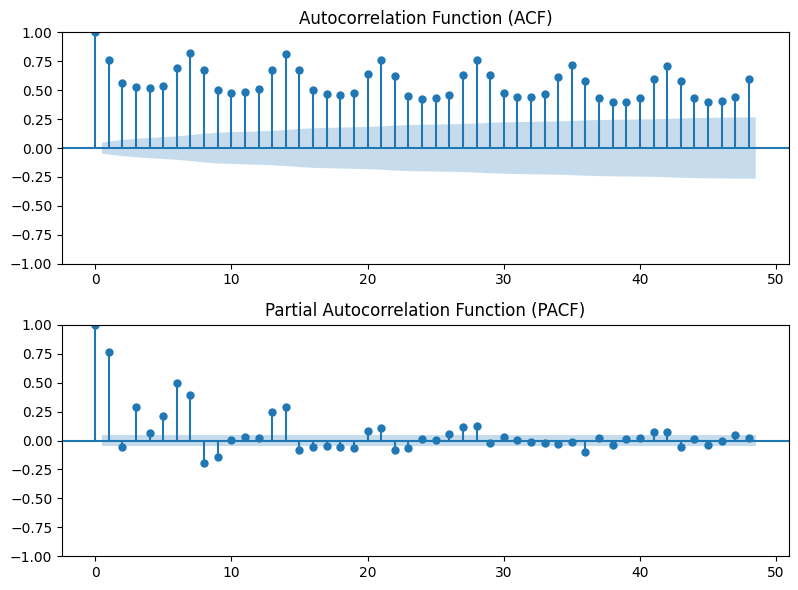

In [40]:
##setting up subplot
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

#ACF plot
ACF(Sale_uni, lags=48, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
PACF(Sale_uni, lags=48, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

MULTIVARIATE MODELLING

In [41]:
merged.isna().sum()

id               0
date             0
store_nbr        0
family           0
sales            0
onpromotion      0
day              0
month            0
year             0
transactions     0
holiday_type     0
locale           0
locale_name      0
description      0
transferred      0
dcoilwtico      33
city             0
state            0
store_type       0
cluster          0
dtype: int64

In [42]:
merged= merged.dropna(subset=["sales", "onpromotion"])

In [43]:
## Replace na values with 0 since no transactions were recorded on the particular date 

merged["transactions"]= merged["transactions"].replace(np.nan, 0)

In [44]:
merged["holiday_type"]= merged["holiday_type"].replace(np.nan, "Not Holiday")

merged["locale"]= merged["locale"].replace(np.nan, "Not Holiday")

merged["transferred"]= merged["transferred"].replace(np.nan, "False")

merged["dcoilwtico"]=  merged["dcoilwtico"].fillna(method= "bfill")

In [45]:
merged.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
day             0
month           0
year            0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
dtype: int64

In [46]:
merged["dcoilwtico"]=  merged["dcoilwtico"].fillna(method= "bfill")

In [47]:
# dropping the locale_name and description of holiday

merged= merged.drop(["locale_name", "description"], axis= 1)

In [48]:
merged

,id,date,store_nbr,family,sales,onpromotion,day,month,year,transactions,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0,1,1,2013,770,Holiday,National,False,97.01,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.000,0,1,1,2013,770,Holiday,National,False,97.01,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.000,0,1,1,2013,770,Holiday,National,False,97.01,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.000,0,1,1,2013,770,Holiday,National,False,97.01,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.000,0,1,1,2013,770,Holiday,National,False,97.01,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000685,2017-08-15,52,POULTRY,397.340,0,15,8,2017,2255,Holiday,Local,False,47.57,Manta,Manabi,A,11
322043,3000686,2017-08-15,52,PREPARED FOODS,104.418,0,15,8,2017,2255,Holiday,Local,False,47.57,Manta,Manabi,A,11
322044,3000687,2017-08-15,52,PRODUCE,3803.368,8,15,8,2017,2255,Holiday,Local,False,47.57,Manta,Manabi,A,11
322045,3000688,2017-08-15,52,SCHOOL AND OFFICE SUPPLIES,17.000,0,15,8,2017,2255,Holiday,Local,False,47.57,Manta,Manabi,A,11


### Feature scaling

In [49]:
merged.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
day                      int32
month                    int32
year                     int32
transactions             int64
holiday_type            object
locale                  object
transferred               bool
dcoilwtico             float64
city                    object
state                   object
store_type              object
cluster                  int64
dtype: object

In [50]:
def MyFeatures(df, date):
    df_copy = df.copy()  # Create a copy of the input DataFrame
    df_copy['day'] = df_copy[date].dt.day
    df_copy['month'] = df_copy[date].dt.month
    df_copy['day_of_month'] = df_copy[date].dt.day
    df_copy['day_of_year'] = df_copy[date].dt.dayofyear
    df_copy['week_of_year'] = df_copy[date].dt.isocalendar().week.astype(int)
    df_copy['day_of_week'] = df_copy[date].dt.dayofweek
    df_copy['is_weekend'] = np.where(df_copy['day_of_week'] > 4, 1, 0)
    df_copy['is_month_start'] = df_copy[date].dt.is_month_start.astype(int)
    df_copy['is_month_end'] = df_copy[date].dt.is_month_end.astype(int)
    df_copy['quarter'] = df_copy[date].dt.quarter
    df_copy['is_quarter_start'] = df_copy[date].dt.is_quarter_start.astype(int)
    df_copy['is_quarter_end'] = df_copy[date].dt.is_quarter_end.astype(int)
    df_copy['is_year_start'] = df_copy[date].dt.is_year_start.astype(int)
    df_copy['is_year_end'] = df_copy[date].dt.is_year_end.astype(int)
    return df_copy

In [51]:
transformed_df= MyFeatures(merged, "date")

In [52]:
# Perform rolling mean on the 'sales' column
transformed_df['sales_rolling_mean'] = transformed_df['sales'].rolling(window=7).mean()

# Perform lagging on the 'sales' column
transformed_df['sales_lag_1'] = transformed_df['sales'].shift(1)
transformed_df['sales_lag_7'] = transformed_df['sales'].shift(7)

In [53]:
# INPUTING MISSING VALUES

categorical_columns = ['family', 'city', 'state', 'holiday_type', 'store_type', 'locale']

numerical_columns =['sales','store_nbr','onpromotion','cluster','dcoilwtico','month','day']

# '''creating copy of the categorical features and numerical features
# before imputing null value to avoid modifying the orginal dataset'''

X_train_cat = transformed_df[categorical_columns].copy()
X_train_num = transformed_df[numerical_columns].copy()

# X_eval_cat = transformed_df[categorical_columns].copy()
# X_eval_num = X_eval[numerical_columns].copy()

# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")
categorical_imputer = SimpleImputer(strategy = "most_frequent")

# Fitting the Imputer
X_train_cat_imputed = categorical_imputer.fit_transform(X_train_cat)
X_train_num_imputed = numerical_imputer.fit_transform(X_train_num)

# X_eval_cat_imputed = categorical_imputer.fit_transform(X_eval_cat)
# X_eval_num_imputed = numerical_imputer.fit_transform(X_eval_num)

In [54]:
# FEATURE ENCODING
encoder=OneHotEncoder(handle_unknown='ignore')

# encoding the xtrain categories and converting to a dataframe
X_train_cat_encoded = encoder.fit(X_train_cat_imputed)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat_imputed).toarray(),
                                   columns=encoder.get_feature_names_out(categorical_columns))

In [55]:
# DATA SCALLING
scaler= StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_train_num_sc = pd.DataFrame(X_train_num_scaled, columns = numerical_columns)

In [56]:
# COMBINING COLUMNS 
X_train_df = pd.concat([X_train_num_sc,X_train_cat_encoded], axis =1)

In [57]:
# Calculate the number of rows in the data
n_rows = X_train_df.shape[0]

# Calculate the split point
split_point = int(n_rows * 0.85)

# Select the first 85% of the rows as the training data
X_train = X_train_df.iloc[:split_point]
y_train = X_train['sales']
X_train = X_train.drop('sales', axis=1)

# Select the remaining 15% of the rows as the validation data
X_eval = X_train_df.iloc[split_point:]
y_eval = X_eval['sales']
X_eval = X_eval.drop('sales', axis=1)


# Verify the lengths of the training and evaluation sets
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_eval:", len(X_eval))
print("Length of y_eval:", len(y_eval))

Length of X_train: 273739
Length of y_train: 273739
Length of X_eval: 48308
Length of y_eval: 48308


### Decision Tree

In [58]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

#Prediction
tree_pred = tree.predict(X_eval)

In [59]:
mse = mean_squared_error(y_eval, tree_pred )
rmse = np.sqrt(mean_squared_error(y_eval, tree_pred )).round(2)

result = pd.DataFrame([['Decision Tree', mse, rmse]], columns = ['Model', 'MSE', 'RMSE',])
result

,Model,MSE,RMSE
0,Decision Tree,0.401134,0.63


### Random Forest

In [60]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_eval)

In [61]:

mse = mean_squared_error(y_eval, rf_pred )
rmse = np.sqrt(mean_squared_error(y_eval, rf_pred )).round(2)

t_result = pd.DataFrame([['Random Forest', mse, rmse]], columns = ['Model', 'MSE', 'RMSE',])

t_result

,Model,MSE,RMSE
0,Random Forest,0.523453,0.72


### Time Series Model using AR

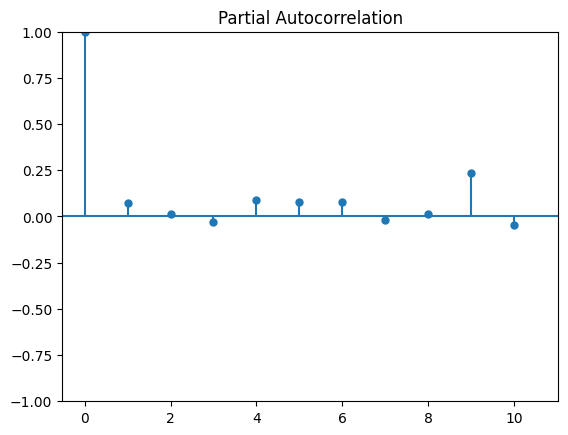

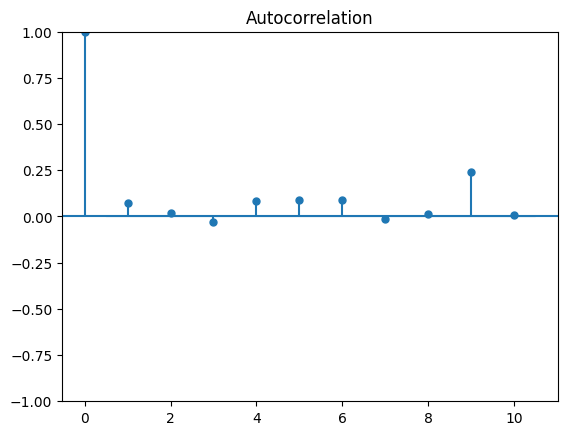

In [62]:
pacf = PACF(y_train, lags = 10)
acf = ACF(y_train, lags = 10)

In [64]:
model = AutoReg(y_train, lags = 5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:               273739
Model:                     AutoReg(5)   Log Likelihood             -387014.265
Method:               Conditional MLE   S.D. of innovations              0.995
Date:                Wed, 04 Oct 2023   AIC                         774042.530
Time:                        20:43:44   BIC                         774116.170
Sample:                             5   HQIC                        774063.913
                               273739                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.002     -0.509      0.610      -0.005       0.003
sales.L1       0.0689      0.002     36.190      0.000       0.065       0.073
sales.L2       0.0185      0.002      9.706      0.000       0.015       0.022
sales.L3      -0.0383      0.002    -20.159      0.000      -0.042      -0.035
sales.L4       0.0815      0.002     42.846      0.000       0.078       0.085
sales.L5       0.0807      0.002     42.335      0.000       0.077       0.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4862           -0.0000j            1.4862           -0.0000
AR.2            0.4014           -1.4894j            1.5426           -0.2081
AR.3            0.4014           +1.4894j            1.5426            0.2081
AR.4           -1.6501           -0.8850j            1.8724           -0.4217
AR.5           -1.6501           +0.8850j            1.8724            0.4217
-----------------------------------------------------------------------------
"""

In [65]:
AR_predict = model.predict(start = len(y_train), end = len(y_train) + len(y_eval) - 1, dynamic = False)

<function matplotlib.pyplot.show(close=None, block=None)>

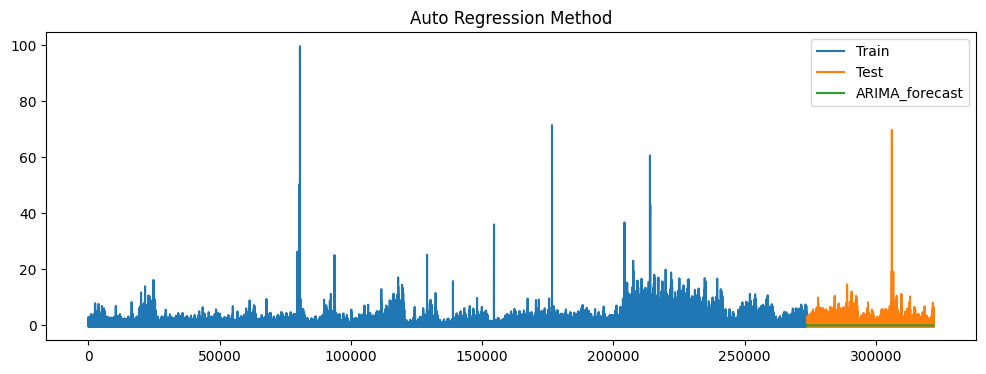

In [66]:
plt.figure(figsize=(12,4))
plt.plot(y_train, label = "Train")
plt.plot(y_eval, label = "Test" )
plt.plot(AR_predict, label = "ARIMA_forecast" )
plt.legend(loc="best")
plt.title('Auto Regression Method')
plt.show

In [68]:
mse = mean_squared_error(y_eval, AR_predict)
#msle = mean_squared_log_error(y_eval, AR_pred)
rmse = np.sqrt(mean_squared_error(y_eval, AR_predict)).round(2)
#rmsle = np.sqrt(mean_squared_log_error(y_eval, AR_pred)).round(2)

#ar_result = pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE','RMSE', 'RMSLE']) 
ar_result = pd.DataFrame([['AR', mse, rmse]], columns = ['Model', 'MSE','RMSE']) 

ar_result

,Model,MSE,RMSE
0,AR,0.939266,0.97
